In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Input, Dense, LSTM, Dropout
from tensorflow.keras import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.utils import shuffle
import os
import json
from tqdm import tqdm
import tensorflow_datasets as tfds

In [2]:
##data
label_folder = 'drive/My Drive/Colab Notebooks/data/challenge2008/training/labels'
data_folder = 'drive/My Drive/Colab Notebooks/data/challenge2008/training/notes_cuis'

# dataset = []
# for file in os.listdir(data_folder):
#     fr = open(os.path.join(data_folder, file),'r')
#     data = fr.read()
#     dataset.append(data)
#     # print(dataset)
#     fr.close()

In [3]:
##label_read(0-undefined, 1-yes, 2-no)
label = np.empty([0,16], dtype = int)

for file in os.listdir(label_folder):
    with open(os.path.join(label_folder, file),'r') as file_read:
        y = np.zeros(16, dtype = int)
        for line in file_read.readlines():
            line = line.split()
            # print(line)
            if line[0] == 'intuitive':
              if line[2] == 'Asthma':
                y[0] = 2 if line[4] == 'N' else 1
              elif line[2] == 'CAD':
                y[1] = 2 if line[4] == 'N' else 1
              elif line[2] == 'CHF':
                y[2] = 2 if line[4] == 'N' else 1
              elif line[2] == 'Depression':
                y[3] = 2 if line[4] == 'N' else 1
              elif line[2] == 'Diabetes':
                y[4] = 2 if line[4] == 'N' else 1
              elif line[2] == 'GERD':
                y[5] = 2 if line[4] == 'N' else 1
              elif line[2] == 'Gallstones':
                y[6] = 2 if line[4] == 'N' else 1
              elif line[2] == 'Gout':
                y[7] = 2 if line[4] == 'N' else 1
              elif line[2] == 'Hypercholesterolemia':
                y[8] = 2 if line[4] == 'N' else 1
              elif line[2] == 'Hypertension':
                y[9] = 2 if line[4] == 'N' else 1
              elif line[2] == 'Hypertriglyceridemia':
                y[10] = 2 if line[4] == 'N' else 1
              elif line[2] == 'OA':
                y[11] = 2 if line[4] == 'N' else 1
              elif line[2] == 'OSA':
                y[12] = 2 if line[4] == 'N' else 1
              elif line[2] == 'Obesity':
                y[13] = 2 if line[4] == 'N' else 1
              elif line[2] == 'PVD':
                y[14] = 2 if line[4] == 'N' else 1
              elif line[2] == 'Venous Insufficiency':
                y[15] = 2 if line[4] == 'N' else 1
        y = np.reshape(y, (1, 16))
        # print(y)
        label = np.concatenate((label, y), axis = 0)
        # print(label.shape)


In [4]:
data_folder = 'drive/My Drive/Colab Notebooks/data/challenge2008/training/notes_cuis'
file_paths = []
for file in os.listdir(data_folder):
    file_paths.append(os.path.join(data_folder, file))

In [5]:
dataset = tf.data.TextLineDataset(file_paths)

for line in dataset.take(5):
  print(line.numpy())

b'C0004238 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0030193 C0038351 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0085619 C0085619 C0226896 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0034063 C0034063 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0019564 C0019564 C0019564 C0019564 C2004489 C0034642 C0202230 C0005767 C0005767 C0007097 C0030252 C1140621 C0449201 C0035639 C0035639 C0035639 C0035639 C0035639 C1278951 C1278951 C0037313 C0009450 C0586177 C0020538 C0032305 C0023928 C1269647 C1269647 C0582147 C0582147 C0582147

In [6]:
tokenizer = tfds.features.text.Tokenizer()

vocabulary_set = set()
for text_tensor in dataset:
  some_tokens = tokenizer.tokenize(text_tensor.numpy())
  vocabulary_set.update(some_tokens)

vocab_size = len(vocabulary_set)
print(vocab_size)

4973


In [7]:
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)

In [8]:
example_text = next(iter(dataset)).numpy()
print(example_text)

encoded_example = encoder.encode(example_text)
print(encoded_example)

b'C0004238 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0150009 C0030193 C0038351 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0150082 C0085619 C0085619 C0226896 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0231418 C0034063 C0034063 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0231416 C0019564 C0019564 C0019564 C0019564 C2004489 C0034642 C0202230 C0005767 C0005767 C0007097 C0030252 C1140621 C0449201 C0035639 C0035639 C0035639 C0035639 C0035639 C1278951 C1278951 C0037313 C0009450 C0586177 C0020538 C0032305 C0023928 C1269647 C1269647 C0582147 C0582147 C0582147

In [9]:
encoded_data = []
for data in dataset:
  text = data.numpy()
  # print(text)
  encoded_text = encoder.encode(text)
  encoded_data.append(encoded_text)

In [10]:
print(encoded_data[0])
print(encoded_data[1])

[1427, 773, 773, 773, 773, 773, 773, 773, 773, 773, 773, 773, 773, 773, 773, 773, 773, 773, 773, 547, 2872, 2067, 2067, 2067, 2067, 2067, 2067, 2067, 2067, 2067, 2067, 2067, 2067, 2067, 2067, 2067, 2067, 2067, 2067, 4504, 4504, 2217, 858, 858, 858, 858, 858, 858, 858, 858, 858, 858, 858, 858, 858, 858, 858, 858, 858, 858, 1175, 1175, 2773, 2773, 2773, 2773, 2773, 2773, 2773, 2773, 2773, 2773, 2773, 2773, 2773, 2773, 2773, 2773, 2773, 2773, 2795, 2795, 2795, 2795, 3655, 2560, 1730, 1650, 1650, 3902, 572, 558, 909, 3024, 3024, 3024, 3024, 3024, 1499, 1499, 1337, 1518, 625, 4584, 2220, 727, 3170, 3170, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 2911, 2911, 3030, 3030, 3030, 3030, 3030, 3030, 3030, 3030, 3030, 3030, 3030, 3030, 3030, 3030, 3030, 3030, 3030, 3030, 3030, 3030, 272, 272, 272, 272, 272, 76, 851, 3513, 3513, 2419, 2419, 2588, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 1397, 733, 733, 268, 22

In [11]:
data = tf.keras.preprocessing.sequence.pad_sequences(encoded_data,
                                                            padding='post')

In [12]:
data,label = shuffle(data, label)

print(label.shape)
print(data.shape)

(730, 16)
(730, 1026)


In [13]:
label1 = (label.T[0]).T
print(label1.shape)

label2 = (label.T[1]).T
print(label2.shape)

(730,)
(730,)


In [14]:
print(label2)

[1 1 1 2 0 1 1 2 1 1 2 1 1 2 1 0 1 1 1 2 1 1 1 1 1 2 0 1 1 1 1 1 1 2 2 0 0
 2 1 2 1 1 1 1 1 2 2 2 2 1 2 2 1 1 2 1 1 1 2 2 1 0 0 0 2 2 2 1 2 0 1 1 0 1
 1 1 2 2 2 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 1 1 1 1 2 2 1 1 2 2 1 2 1 1 2
 1 2 2 0 1 1 0 0 2 2 2 1 2 1 1 2 1 0 1 2 1 1 2 0 2 1 1 1 1 2 2 1 2 2 2 1 1
 2 0 2 1 1 2 2 1 2 2 1 1 1 1 2 1 2 2 1 2 2 2 2 2 1 0 1 1 0 2 2 1 2 1 1 2 2
 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 2 1 1 1 1 2 2 1 2 1 2 1 2 1 1 1 0 1 2 0 1
 2 1 1 1 1 1 1 1 2 0 2 1 2 2 1 2 0 1 2 0 0 2 1 2 1 1 1 1 2 1 0 2 1 2 2 0 2
 2 2 1 1 2 1 1 0 2 1 1 2 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 2 0 2 1 2 1 1 1 1 0
 1 2 1 1 2 2 1 1 1 2 1 2 0 0 2 1 1 1 1 1 2 1 1 2 2 1 1 2 1 2 1 2 1 1 2 2 1
 2 2 2 2 1 1 1 2 2 2 1 1 0 2 2 1 2 1 1 1 1 1 2 2 2 2 0 1 1 1 1 0 1 1 2 1 1
 1 0 2 1 2 0 2 1 1 2 2 1 2 1 1 2 1 1 2 2 1 1 1 1 2 1 2 1 1 0 2 0 1 2 1 1 2
 1 1 1 2 1 2 1 1 1 1 0 1 1 2 2 1 1 2 2 2 2 2 2 2 1 2 1 0 1 0 1 1 2 1 2 2 2
 1 1 1 1 1 1 1 0 2 2 2 1 1 1 0 1 1 1 0 2 1 1 2 1 1 2 1 1 2 1 2 1 2 1 1 1 0
 0 2 1 1 1 0 1 2 1 1 2 1 

In [15]:
reg_val = 1e-3

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size+1, 64))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(reg_val), bias_regularizer=regularizers.l2(reg_val)))
model.add(tf.keras.layers.Dropout(0.5))

# split = tf.keras.layers.Lambda(lambda x: tf.split(x,num_or_size_splits=2,axis=-1))(data)
# base1 = tf.keras.layers.Dense(1, activation='sigmoid')(split[0])

model.add(tf.keras.layers.Dense(1, activation='softmax', kernel_regularizer=regularizers.l2(reg_val), bias_regularizer=regularizers.l2(reg_val)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          318336    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               197632    
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 532,481
Trainable params: 532,481
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [17]:
results = model.fit(data, label2, batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10
19/19 [==============================] - 37s 2s/step - loss: 0.0000e+00 - accuracy: 0.5497 - val_loss: 0.0000e+00 - val_accuracy: 0.5137
Epoch 2/10
19/19 [==============================] - 37s 2s/step - loss: 0.0000e+00 - accuracy: 0.5497 - val_loss: 0.0000e+00 - val_accuracy: 0.5137
Epoch 3/10
19/19 [==============================] - 37s 2s/step - loss: 0.0000e+00 - accuracy: 0.5497 - val_loss: 0.0000e+00 - val_accuracy: 0.5137
Epoch 4/10
19/19 [==============================] - 37s 2s/step - loss: 0.0000e+00 - accuracy: 0.5497 - val_loss: 0.0000e+00 - val_accuracy: 0.5137
Epoch 5/10
19/19 [==============================] - 37s 2s/step - loss: 0.0000e+00 - accuracy: 0.5497 - val_loss: 0.0000e+00 - val_accuracy: 0.5137
Epoch 6/10
19/19 [==============================] - 37s 2s/step - loss: 0.0000e+00 - accuracy: 0.5497 - val_loss: 0.0000e+00 - val_accuracy: 0.5137
Epoch 7/10
19/19 [==============================] - 37s 2s/step - loss: 0.0000e+00 - accuracy: 0.5497 - val_loss

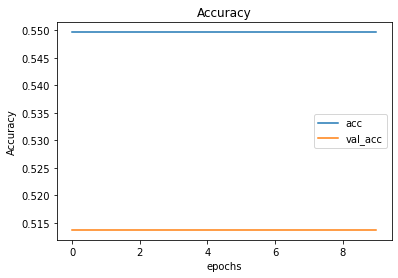

In [18]:
import matplotlib.pyplot as plt

acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

epochs = np.arange(len(acc))

plt.figure()
plt.plot(epochs, acc, label='acc')
plt.plot(epochs, val_acc, label='val_acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
# plt.title(f'Accuracy with Regularizer: {reg_val : 3.2g}; Dropout: {dropout_rate : 3.2g} ')
plt.title(f'Accuracy')

plt.legend()